# Water Quality Dataset EDA - Machine Learning

In this kernel I'm going to explore the water quality dataset using EDA tools and visualizations and then I'll find the best machine learning algorithm to create a classifier using sklearn.


# Table Of Content

1. Preparing Environment & Loading Data
2. Exploratory Data Analysis
    1. Class Distribution
    2. Features' Mean By Classes
    3. Features' Distribution By Classes
    4. Correlation Between Features
    5. Visualizing Data 2D using PCA
3. Data Preprocessing
    1. Filling Nan Values
    2. Scaling Between 0 and 1
    3. Train Test Split
4. Machine Learning 
    1. Decision Tree
    2. Random Forest
    3. Logistic Regression
    4. Support Vector Machine
    5. Adaboost (DTC Week Learner)
   

# Preparing Environment & Loading Data
In this section I'm going to import libraries I need and load the dataset using Pandas.$$

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


import warnings as wrn
wrn.filterwarnings("ignore")

In [7]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Exploratory Data Analysis

In this section we're gonna discover the dataset 

## 1. Class Distribution

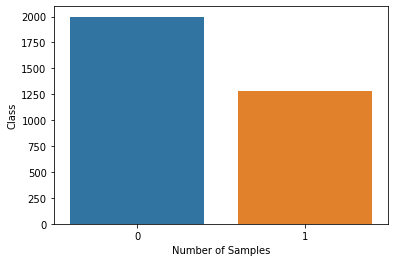

In [6]:
fig,ax = plt.subplots(figsize=(6,4))
sns.countplot(data["Potability"])
plt.ylabel("Class")
plt.xlabel("Number of Samples")
plt.show()

* Class 0, water that is dangerous to drink, has 2000 samples while Class 1 has 1250 samples so data is a bit unbalanced but it won't be a problem I guess.


## 2.Mean of Features by Classes

### Feature 1: PH

In [19]:
def getMeansByClasses(feature_label):
    feature_means = data.groupby("Potability")[feature_label].mean()
    print(feature_means)

    _,_ = plt.subplots(figsize=(6,4))
    sns.barplot(feature_means.index,feature_means.values,palette="PuRd")
    plt.show()

Potability
0    7.085378
1    7.073783
Name: ph, dtype: float64


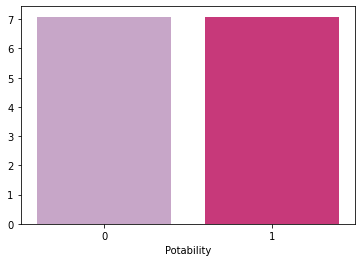

In [20]:
getMeansByClasses("ph")

* There is almost no difference between the two classes, we might need to drop this feature after looking at histograms.

### Feature 2: Hardness

Potability
0    196.733292
1    195.800744
Name: Hardness, dtype: float64


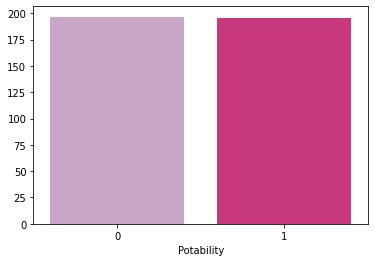

In [21]:
getMeansByClasses("Hardness")

* Things started to get strange, there is almost no difference between the means of hardness of these two classes as well.

### Feature 3: Solids

Potability
0    21777.490788
1    22383.991018
Name: Solids, dtype: float64


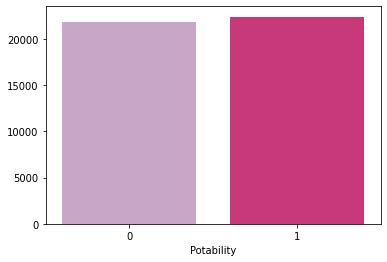

In [22]:
getMeansByClasses("Solids")

* Hmm, this feature seems like other features too. There is no big differences between these two classes but at least this feature might be more descriptive

### Feature 4: Chloramines

Potability
0    7.092175
1    7.169338
Name: Chloramines, dtype: float64


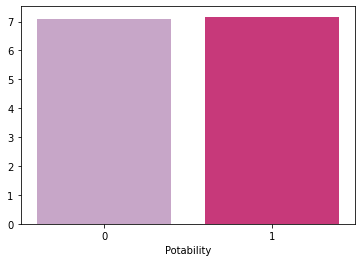

In [23]:
getMeansByClasses("Chloramines")

* They looks same but like the previous feature there is a little (really little) difference between them.

### Features 5: Sulfate

Potability
0    334.56429
1    332.56699
Name: Sulfate, dtype: float64


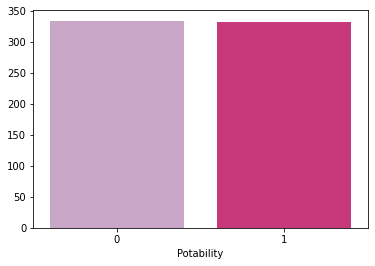

In [24]:
getMeansByClasses("Sulfate")

* This is one of the most strange datasets I've seen as a junior data scientist (in fact I'm an highschool student but who cares, I can consider myself junior data scientists.)
  
### Feature 6: Conductivity

Potability
0    426.730454
1    425.383800
Name: Conductivity, dtype: float64


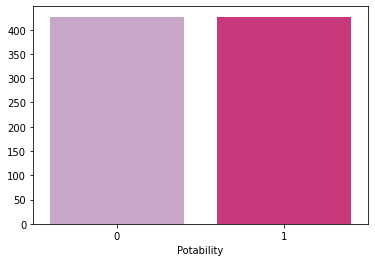

In [25]:
getMeansByClasses("Conductivity")

### Feature 7: Organic Carbon

Potability
0    14.364335
1    14.160893
Name: Organic_carbon, dtype: float64


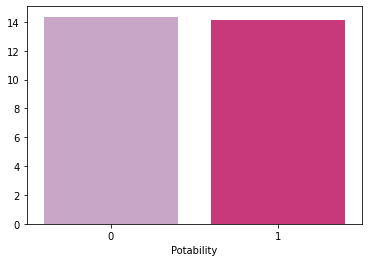

In [26]:
getMeansByClasses("Organic_carbon")

### Feature 8: Trihalomethanes

Potability
0    66.303555
1    66.539684
Name: Trihalomethanes, dtype: float64


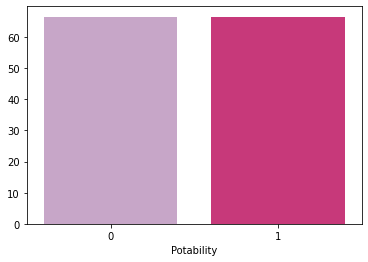

In [27]:
getMeansByClasses("Trihalomethanes")

* Oh, there is no difference, really strange.

### Feature 9: Turbidity

Potability
0    3.965800
1    3.968328
Name: Turbidity, dtype: float64


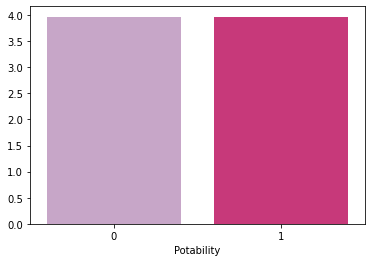

In [28]:
getMeansByClasses("Turbidity")

### Features Distribution By Classes

### Feature 1: PH

In [38]:
def getFeaturesDistributionByClasses(feature_label):
    class_0 = data[data["Potability"] == 0.0][feature_label]
    class_1 = data[data["Potability"] == 1.0][feature_label]

    figure = plt.figure()
    figure.add_subplot(1,2,1)
    plt.hist(x=class_0)
    plt.xlabel("Distribution")
    plt.title("Class 0 | Feature {}".format(feature_label.capitalize()))

    figure.add_subplot(1,2,2)
    plt.hist(x=class_1)
    plt.xlabel("Distribution")
    plt.title("Class 1 | Feature {}".format(feature_label.capitalize()))

    plt.show()

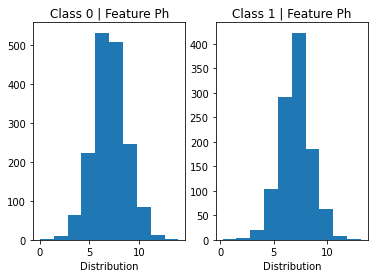

In [39]:
getFeaturesDistributionByClasses("ph")

### Features 2: Hardness

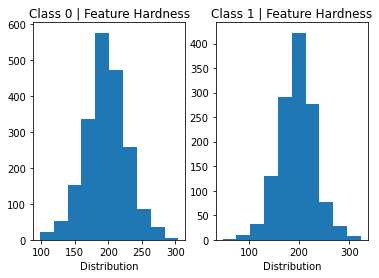

In [40]:
getFeaturesDistributionByClasses("Hardness")

### Feature 3: Solids

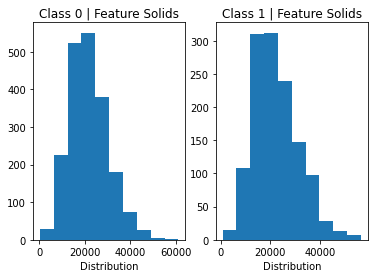

In [41]:
getFeaturesDistributionByClasses("Solids")

### Feature 4: Chloramines

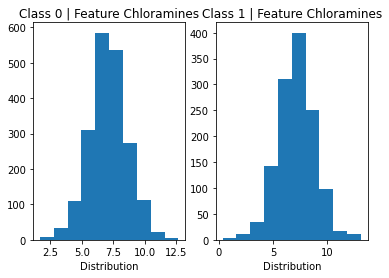

In [42]:
getFeaturesDistributionByClasses("Chloramines")

### Feature 5: Sulfate

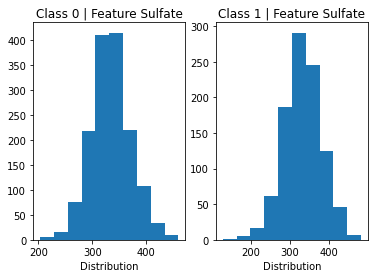

In [43]:
getFeaturesDistributionByClasses("Sulfate")

### Feature 6: Conductivity

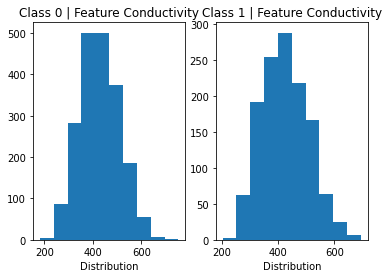

In [44]:
getFeaturesDistributionByClasses("Conductivity")

### Feature 7: Organic Carbon

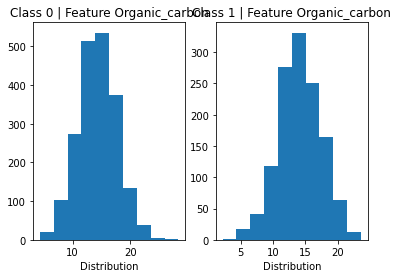

In [45]:
getFeaturesDistributionByClasses("Organic_carbon")

### Feature 8: Trihalomethanes

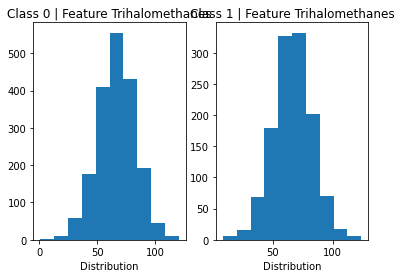

In [46]:
getFeaturesDistributionByClasses("Trihalomethanes")

### Features 9: Turbidity

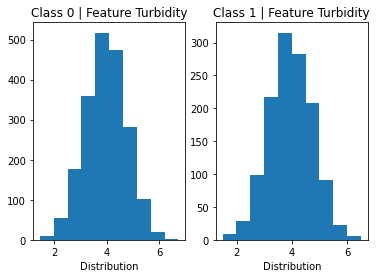

In [47]:
getFeaturesDistributionByClasses("Turbidity")

## Correlation Between Features

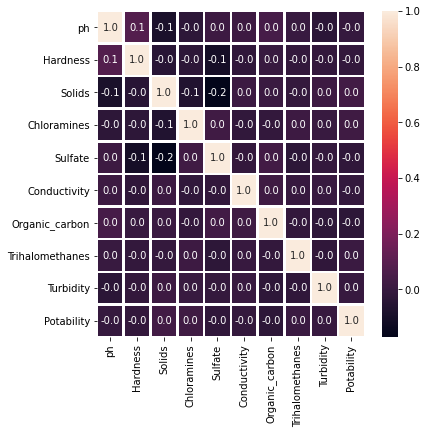

In [49]:
_,_ = plt.subplots(figsize=(6,6))
sns.heatmap(data.corr(),linewidths=1.5,annot=True,fmt=".1f")
plt.show()

## Visualizing Data 2D Using PCA

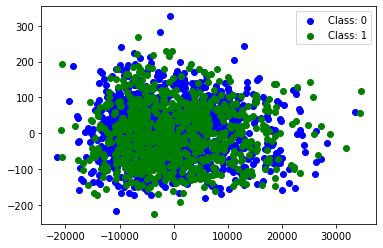

In [65]:
pca = PCA(n_components=2)
x_class0 = np.asarray(data.drop("Potability",axis=1).dropna()[data["Potability"] == 0.0])
x_class1 = np.asarray(data.drop("Potability",axis=1).dropna()[data["Potability"] == 1.0])

pca.fit(np.asarray(data.drop("Potability",axis=1).dropna()))
x_class0_2d = pca.transform(x_class0)
x_class1_2d = pca.transform(x_class1)

plt.subplots()
plt.scatter(x_class0_2d[:,0],x_class0_2d[:,1],label="Class: 0",c="blue")
plt.scatter(x_class1_2d[:,0],x_class1_2d[:,1],label="Class: 1",c="green")
plt.legend()
plt.show()


# Data Preprocessing
We explored data and now it's time to process it in order to use it to train a classifier.

In [66]:
# We'll start by splitting x and y
x = np.asarray(data.drop("Potability",axis=1))
y = np.asarray(data["Potability"])

In [70]:
# There are nan values in the dataset, and now we'll fill them by mean of each feature
mean_imputer = SimpleImputer()
x_filled = mean_imputer.fit_transform(x)
print("Number of nan values:",np.isnan(x_filled).sum())

Number of nan values: 0


In [71]:
# Each feature has a different scaling but in order to prevent problems in machine learning 
# we have to scale them between 0 and 1

scaler = MinMaxScaler()

x_scaled = scaler.fit_transform(x_filled)

x_scaled

array([[0.50577104, 0.57113901, 0.33609646, ..., 0.31340165, 0.69975313,
        0.28609102],
       [0.26543429, 0.29740043, 0.30061142, ..., 0.49731851, 0.4509993 ,
        0.57679264],
       [0.57850887, 0.64131081, 0.32161885, ..., 0.56201674, 0.5328657 ,
        0.30363656],
       ...,
       [0.67282217, 0.46548556, 0.53910122, ..., 0.33866167, 0.56065454,
        0.34956996],
       [0.36619735, 0.66440723, 0.19148981, ..., 0.34363779, 0.62265916,
        0.61611996],
       [0.56247653, 0.53563505, 0.28048408, ..., 0.5341137 , 0.63247754,
        0.16244074]])

In [73]:
# Everything is ready about X, and all we need to do for Y is changing datatype to integer.
y = y.astype(int)

# Data is ready, now we can split data into test and train set
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
 

(2457, 9)
(819, 9)
(2457,)
(819,)


# Machine Learning
In this section we're going to fit machine learning models using preprocessed data. First we'll decide on an algorithm by checking the validation accuracy. Then we'll create the confusion matrix of the algorithm we chose.

## 1. Decision Tree


In [75]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print("Decison Tree Classifier",round(dtc.score(x_test,y_test),2))

Decison Tree Classifier 0.58


* Predictable, classes values are insanely similar, so we need something more complex.

## 2. Random Forest

In [76]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print("Random Forest Classifier",round(rfc.score(x_test,y_test),2))

Random Forest Classifier 0.67


* Better, but not enough.

## 3. Logistic Regression

In [77]:
lrc = LogisticRegression()
lrc.fit(x_train,y_train)
print("Logistic Regression",round(lrc.score(x_test,y_test),2))

Logistic Regression 0.62


## 4. Support Vector Machine

In [78]:
svc = SVC()
svc.fit(x_train,y_train)
print("Support Vector Clasifier",round(svc.score(x_test,y_test),2))

Support Vector Clasifier 0.68


## 5. Adaboost (Based on DTC)

In [79]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier())
adaboost.fit(x_train,y_train)
print("Adaboost Based On DTC",round(adaboost.score(x_test,y_test),2))

Adaboost Based On DTC 0.6


**Result**: This data is one of the hardest datasets I've seen because all features are almost acts same, it's even hard for a human. So %68 with Support Vector Machine is not that bad.
 